DBSCAN_CLUSTERING

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x=df.iloc[:,[3,4]].values
    


Text(0.5, 1.0, 'mall customer')

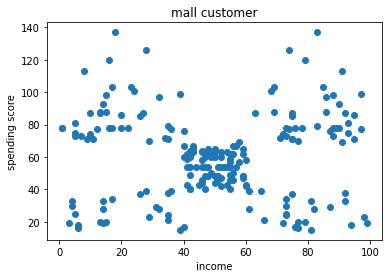

In [7]:
#dataset viewed in graph
#plot data points
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])
plt.xlabel('income')
plt.ylabel('spending score')
plt.title('mall customer')



In [8]:
from sklearn.cluster import DBSCAN
dbscancluster=DBSCAN(eps=7,min_samples=5)
labels=dbscancluster.fit_predict(x)
#clusters=dbscancluster.labels_
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [19]:
len(set(clusters))

7

In [9]:
# scaling the data #improve the model 
from sklearn.preprocessing import normalize
scaled=normalize(x)
scaled=pd.DataFrame(x)
scaled.head()

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
supervised=pd.DataFrame(df)
supervised['Cluster_group']=labels
supervised.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1


C:\Users\Yaazh\anaconda3\envs\ai\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


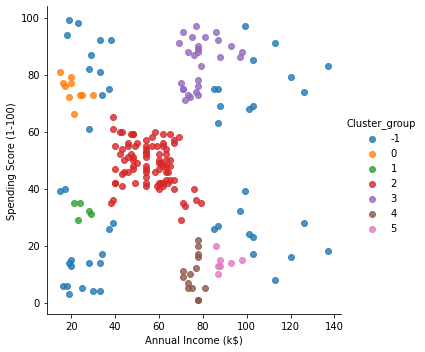

In [27]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(x,labels)


0.2341227329782859